* First, solve the case study using ChatGPT as an assistant. For this, you need to document the prompt you are giving to ChatGPT, the results produced by ChatGPT, and your analysis of these results. 
* Second, improve upon the solution provided by ChatGPT. This involves analyzing the solution generated by ChatGPT, identifying areas for improvement, and implementing these enhancements. These could be in terms of data processing, accuracy of the analysis, visualization, handling edge cases, or anything else that you think would lead to a better solution. Justify why these improvements are necessary and how they contribute to a more comprehensive understanding of the data.

### 1. Import Dependencies

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [175]:
df = pd.read_csv('ecommerce-session-bigquery.csv')

### 2. Preprocessing

In [3]:
# Display first few rows
df.head()

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,...,itemQuantity,itemRevenue,transactionRevenue,transactionId,pageTitle,searchKeyword,pagePathLevel1,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
0,2515546493837534633,Organic Search,966564,Taiwan,(not set),NaN,NaN,1567.0,82.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
1,9361741997835388618,Organic Search,157377,France,not available in demo dataset,NaN,NaN,321.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
2,7313828956068851679,Referral,228279,United States,San Francisco,NaN,NaN,927.0,11.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
3,6036794406403793540,Organic Search,1615618,United States,Boulder,NaN,NaN,1616.0,13.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN
4,7847280609739507227,Organic Search,37832,Canada,not available in demo dataset,NaN,NaN,1222.0,45.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,/storeitem.html,0,1,NaN


In [4]:
# Calculates statistics such as count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each column.
df.describe()

,fullVisitorId,time,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,productRefundAmount,...,productPrice,productRevenue,itemQuantity,itemRevenue,transactionRevenue,transactionId,searchKeyword,eCommerceAction_type,eCommerceAction_step,eCommerceAction_option
count,1.000000e+04,1.000000e+04,6.190000e+02,628.000000,9713.000000,9999.000000,19.000000,1.000000e+04,1.000000e+04,0.0,...,1.000000e+04,0.0,0.0,0.0,0.0,0.0,0.0,10000.000000,10000.0,0.0
mean,4.538050e+18,3.248462e+05,2.103635e+08,1.050955,720.119222,22.142114,50.210526,2.016097e+07,1.473169e+09,NaN,...,1.585565e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.071500,1.0,NaN
std,3.038982e+18,5.647221e+05,5.656026e+08,0.289005,967.997653,26.631372,32.481754,9.067598e+02,2.518655e+06,NaN,...,2.095339e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.363595,0.0,NaN
min,1.664653e+14,0.000000e+00,3.530000e+06,1.000000,1.000000,1.000000,1.000000,2.016080e+07,1.470036e+09,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
25%,1.701094e+18,4.252400e+04,5.508000e+07,1.000000,164.000000,7.000000,19.500000,2.016082e+07,1.471555e+09,NaN,...,4.990000e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
50%,4.449181e+18,1.357180e+05,9.542000e+07,1.000000,383.000000,14.000000,62.000000,2.016090e+07,1.473019e+09,NaN,...,9.990000e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
75%,7.170959e+18,3.542545e+05,1.866600e+08,1.000000,898.000000,27.000000,79.000000,2.016092e+07,1.474471e+09,NaN,...,1.599000e+07,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
max,9.994767e+18,1.089403e+07,6.831960e+09,6.000000,15020.000000,429.000000,92.000000,2.017080e+07,1.501622e+09,NaN,...,9.999000e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.0,NaN


In [5]:
# summary the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fullVisitorId            10000 non-null  uint64 
 1   channelGrouping          10000 non-null  object 
 2   time                     10000 non-null  int64  
 3   country                  10000 non-null  object 
 4   city                     10000 non-null  object 
 5   totalTransactionRevenue  619 non-null    float64
 6   transactions             628 non-null    float64
 7   timeOnSite               9713 non-null   float64
 8   pageviews                9999 non-null   float64
 9   sessionQualityDim        19 non-null     float64
 10  date                     10000 non-null  int64  
 11  visitId                  10000 non-null  int64  
 12  type                     10000 non-null  object 
 13  productRefundAmount      0 non-null      float64
 14  productQuantity        

In [6]:
# Check missing value in column
df.isna().sum()

fullVisitorId                  0
channelGrouping                0
time                           0
country                        0
city                           0
totalTransactionRevenue     9381
transactions                9372
timeOnSite                   287
pageviews                      1
sessionQualityDim           9981
date                           0
visitId                        0
type                           0
productRefundAmount        10000
productQuantity             9955
productPrice                   0
productRevenue             10000
productSKU                     0
v2ProductName                  0
v2ProductCategory              0
productVariant                 0
currencyCode                 386
itemQuantity               10000
itemRevenue                10000
transactionRevenue         10000
transactionId              10000
pageTitle                     92
searchKeyword              10000
pagePathLevel1                 0
eCommerceAction_type           0
eCommerceA

In [147]:
# Find columns with missing values
missing_counts = df.isna().sum().index.tolist()

# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_df = [col for col in missing_counts if col in cat_cols]

# Select numerical columns
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
num_df = [col for col in missing_counts if col in num_cols]

# Print the resulting DataFrames
print("Columns with missing values:\n", missing_counts)
print("\nCategorical columns:\n", cat_df)
print("\nNumerical columns:\n", num_df)


Columns with missing values:
 ['fullVisitorId', 'channelGrouping', 'time', 'country', 'city', 'totalTransactionRevenue', 'transactions', 'timeOnSite', 'pageviews', 'sessionQualityDim', 'date', 'visitId', 'type', 'productRefundAmount', 'productQuantity', 'productPrice', 'productRevenue', 'productSKU', 'v2ProductName', 'v2ProductCategory', 'productVariant', 'currencyCode', 'itemQuantity', 'itemRevenue', 'transactionRevenue', 'transactionId', 'pageTitle', 'searchKeyword', 'pagePathLevel1', 'eCommerceAction_type', 'eCommerceAction_step', 'eCommerceAction_option']

Categorical columns:
 ['channelGrouping', 'country', 'city', 'type', 'productSKU', 'v2ProductName', 'v2ProductCategory', 'productVariant', 'currencyCode', 'pageTitle', 'pagePathLevel1']

Numerical columns:
 ['fullVisitorId', 'time', 'totalTransactionRevenue', 'transactions', 'timeOnSite', 'pageviews', 'sessionQualityDim', 'date', 'visitId', 'productRefundAmount', 'productQuantity', 'productPrice', 'productRevenue', 'itemQuantity'

In [112]:
# Check the number of missing values in numerical columns
df[num_df].isna().sum()

fullVisitorId                  0
time                           0
totalTransactionRevenue     9381
transactions                9372
timeOnSite                   287
pageviews                      1
sessionQualityDim           9981
date                           0
visitId                        0
productRefundAmount        10000
productQuantity             9955
productPrice                   0
productRevenue             10000
itemQuantity               10000
itemRevenue                10000
transactionRevenue         10000
transactionId              10000
searchKeyword              10000
eCommerceAction_type           0
eCommerceAction_step           0
eCommerceAction_option     10000
dtype: int64

In [176]:
# Replace NaN values in each numerical column with 0 value
df[num_df] = df[num_df].fillna(0)

In [149]:
# Check if there still missing values in numerical columns
df[num_df].isna().sum()

fullVisitorId              0
time                       0
totalTransactionRevenue    0
transactions               0
timeOnSite                 0
pageviews                  0
sessionQualityDim          0
date                       0
visitId                    0
productRefundAmount        0
productQuantity            0
productPrice               0
productRevenue             0
itemQuantity               0
itemRevenue                0
transactionRevenue         0
transactionId              0
searchKeyword              0
eCommerceAction_type       0
eCommerceAction_step       0
eCommerceAction_option     0
dtype: int64

In [115]:
# Check missing values in categorical column
df[cat_df].isna().sum()

channelGrouping        0
country                0
city                   0
type                   0
productSKU             0
v2ProductName          0
v2ProductCategory      0
productVariant         0
currencyCode         386
pageTitle             92
pagePathLevel1         0
dtype: int64

In [150]:
# Check unique value from categorical column
print(df.currencyCode.unique())
print(df.pageTitle.unique())

['USD' nan]
[nan 'Fun' 'Pet' 'Bags']


In [177]:
# Fill NaN values with mode of the column
df['currencyCode'] = df['currencyCode'].fillna(df['currencyCode'].mode()[0])
df['pageTitle'] = df['pageTitle'].fillna(df['pageTitle'].mode()[0])

In [152]:
# Check if there still missing values in categorical column
df[cat_df].isna().sum()

channelGrouping      0
country              0
city                 0
type                 0
productSKU           0
v2ProductName        0
v2ProductCategory    0
productVariant       0
currencyCode         0
pageTitle            0
pagePathLevel1       0
dtype: int64

### 3. Data Analysis

##### 1. Identify top products based on the total transaction revenue per day.

GPT Prompt:

Prompt 1: "I have column 'v2productCategory', 'v2productName', 'totalTransactionRevenue' ,and 'date' with format '%y%m%d'. sort 'totalTransactionRevenue' ascending with 10 data and then visualise with matplotlib."

Prompt 2: "Make avarage from 'totalTransactionRevenue' ascending with 10 data and then visualise with matplotlib."

In [178]:
# Do some feature engineering
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

# Create new columns 'year', 'month', and 'day'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

          date                v2ProductName  totalTransactionRevenue
105 2017-04-07         YouTube RFID Journal             6.831960e+09
24  2016-08-25                    Sport Bag             6.239580e+09
21  2016-08-22     Collapsible Shopping Bag             5.945580e+09
62  2016-10-02       Google Pet Feeding Mat             2.447870e+09
56  2016-09-26  Electronics Accessory Pouch             2.401700e+09
45  2016-09-15     Suitcase Organizer Cubes             1.894180e+09
19  2016-08-20              Google Tote Bag             1.455770e+09
58  2016-09-28            Google Sunglasses             1.002590e+09
5   2016-08-06           Waterpoof Gear Bag             9.861500e+08
14  2016-08-15              Google Tote Bag             7.938800e+08


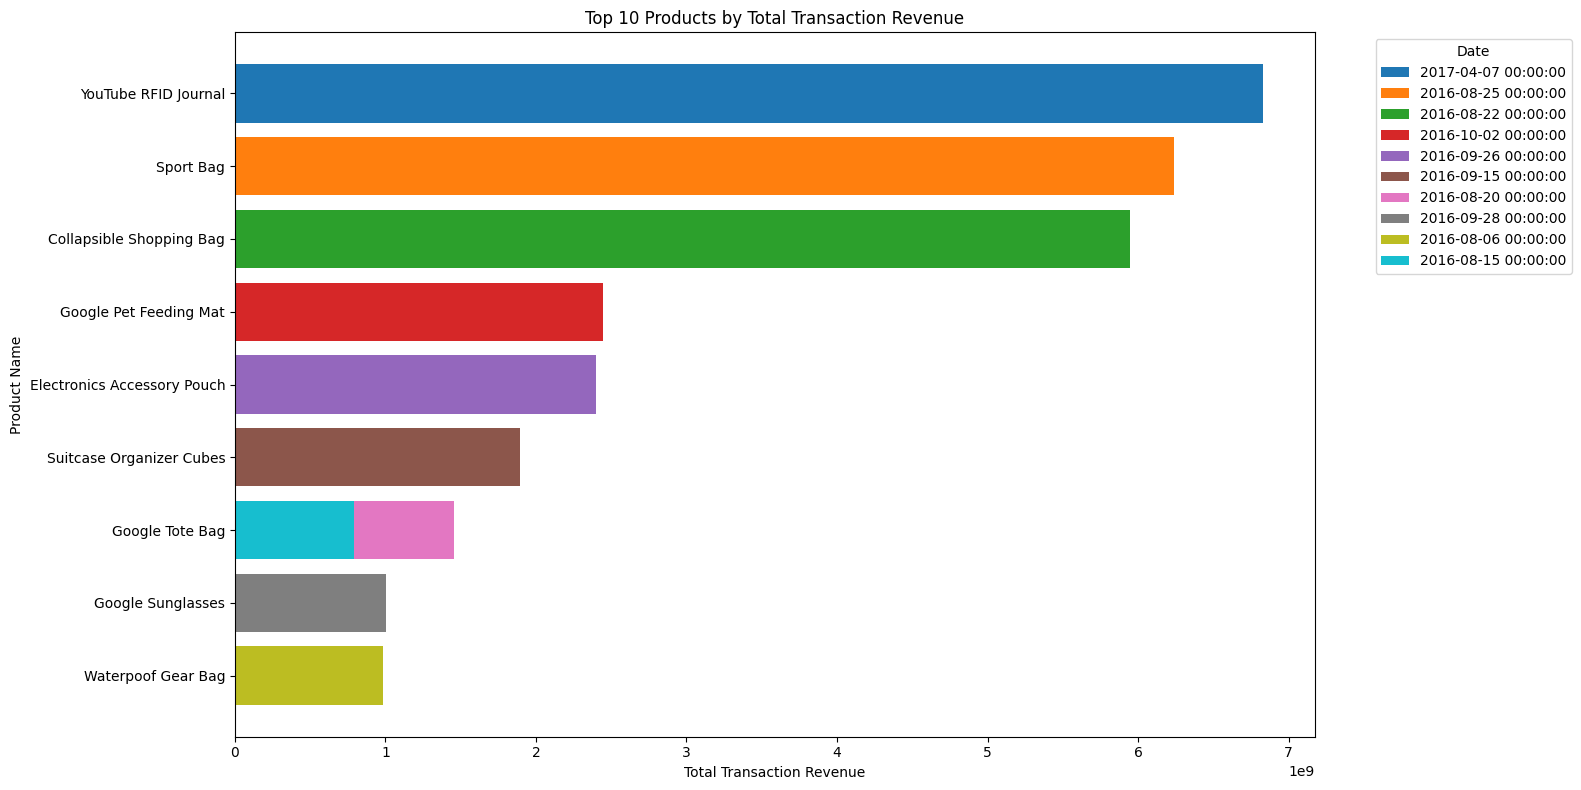

In [179]:
# Sort the data by 'totalTransactionRevenue' in ascending order
sorted_data = df.sort_values(by='totalTransactionRevenue', ascending=True)

# Identify top products based on total transaction revenue per day
top_products_per_day = sorted_data.groupby('date').apply(lambda x: x.nlargest(1, 'totalTransactionRevenue')).reset_index(drop=True)

# Plot the top 10 products by 'totalTransactionRevenue'
top_10_data = top_products_per_day.nlargest(10, 'totalTransactionRevenue')

# Display the sorted data
print(top_10_data[['date', 'v2ProductName', 'totalTransactionRevenue']])

plt.figure(figsize=(16, 8))

for date in top_10_data['date'].unique():
    data_for_date = top_10_data[top_10_data['date'] == date]
    plt.barh(data_for_date['v2ProductName'], data_for_date['totalTransactionRevenue'], label=str(date))

plt.xlabel('Total Transaction Revenue')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Total Transaction Revenue')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Based on the data above, we have 10 products with the highest total transaction revenue in a single day. The product with the highest transaction revenue is Youtube RFID Journal on 7 April 2017. Followed by other products as follows:

1. YouTube RFID Journal
2. Sport Bag 
3. Collapsible Shopping Bag
4. Google Pet Feeding Mat
5. Electronics Accessory Pouch
6. Suitcase Organizer Cubes
7. Google Tote Bag
8. Google Sunglasses
9. Waterpoof Gear Bag

                  v2ProductName  totalTransactionRevenue
59         YouTube RFID Journal             6.831960e+09
52                    Sport Bag             3.267000e+09
27       Google Pet Feeding Mat             1.223935e+09
8      Collapsible Shopping Bag             1.122873e+09
55           Waterpoof Gear Bag             9.861500e+08
54     Suitcase Organizer Cubes             9.470900e+08
30            Google Sunglasses             6.669400e+08
32              Google Tote Bag             6.015420e+08
9   Electronics Accessory Pouch             4.875725e+08
45   Latitudes Foldaway Shopper             3.886450e+08


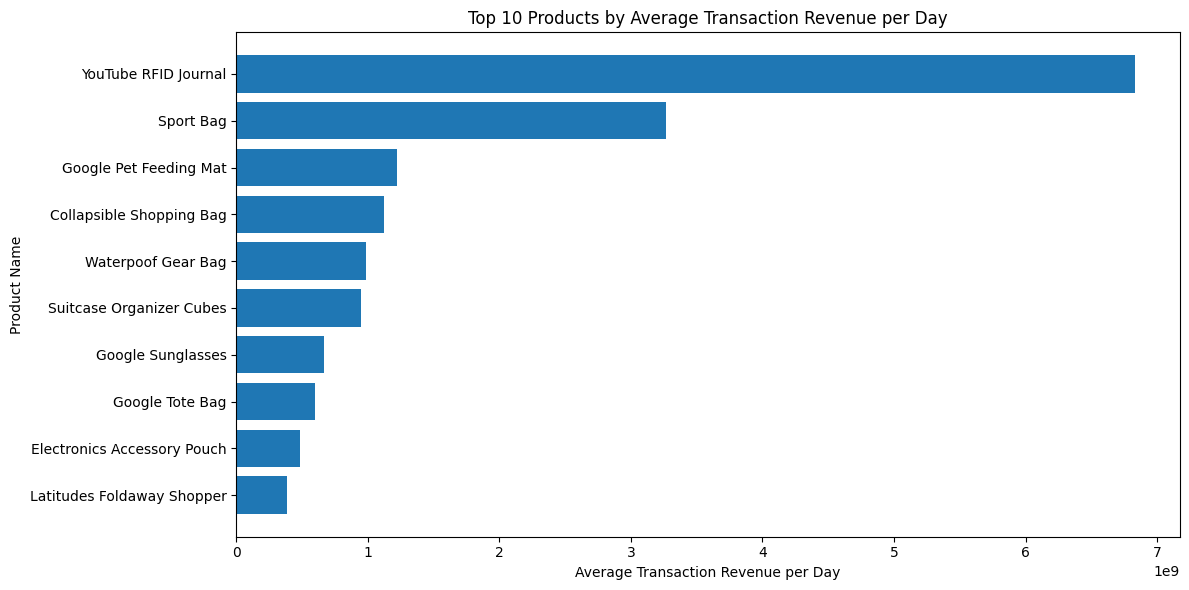

In [193]:
# Calculate average total transaction revenue per day for each product
avg_revenue = top_products_per_day.groupby('v2ProductName')['totalTransactionRevenue'].mean().reset_index()

# Sort the products based on average revenue per day in descending order
sorted_avg_revenue = avg_revenue.sort_values(by='totalTransactionRevenue', ascending=False)
top_10_products = sorted_avg_revenue.head(10)

# Print the sorted products by average revenue per day
print(top_10_products)

# Plot the top 10 products by average revenue per day
plt.figure(figsize=(12, 6))


plt.barh(top_10_products['v2ProductName'], top_10_products['totalTransactionRevenue'])
plt.xlabel('Average Transaction Revenue per Day')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Average Transaction Revenue per Day')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Based on the data above, we have 10 products with the highest avarage total transaction revenue in a single day. The product with the highest transaction revenue is Youtube RFID Journal. Followed by other products as follows:

1. YouTube RFID Journal
2. Sport Bag 
3. Google Pet Feeding Mat
4. Collapsible Shopping Bag
5. Waterpoof Gear Bag
6. Suitcase Organizer Cubes
7. Google Sunglasses
8. Google Tote Bag
9. Electronics Accessory Pouch
10. Latitudes Foldaway Shopper 

##### 2. Detect any anomalies, such as a sharp decrease or increase in the number of transactions for a specific product.

GPT Prompt:

"I want to detect any anomalies, such as a sharp decrease or increase in the number of transactions for a specific product.

with product "v2ProductName", such as:
1. YouTube RFID Journal
2. Sport Bag
3. Waterproof Gear Bag
4. Google Pet Feeding Mat
5. Collapsible Shopping Bag"

In [181]:
# Check column names
print(df.columns)

# Check if 'date' is in the columns
if 'date' in df.columns:
    # Set 'date' column as the index
    df.set_index('date', inplace=True)
else:
    print("The 'date' column is not present in the DataFrame.")


Index(['fullVisitorId', 'channelGrouping', 'time', 'country', 'city',
       'totalTransactionRevenue', 'transactions', 'timeOnSite', 'pageviews',
       'sessionQualityDim', 'date', 'visitId', 'type', 'productRefundAmount',
       'productQuantity', 'productPrice', 'productRevenue', 'productSKU',
       'v2ProductName', 'v2ProductCategory', 'productVariant', 'currencyCode',
       'itemQuantity', 'itemRevenue', 'transactionRevenue', 'transactionId',
       'pageTitle', 'searchKeyword', 'pagePathLevel1', 'eCommerceAction_type',
       'eCommerceAction_step', 'eCommerceAction_option', 'year', 'month',
       'day'],
      dtype='object')


c:\Users\Yonti's\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_lof.py:283: UserWarning: n_neighbors (5) is greater than the total number of samples (2). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


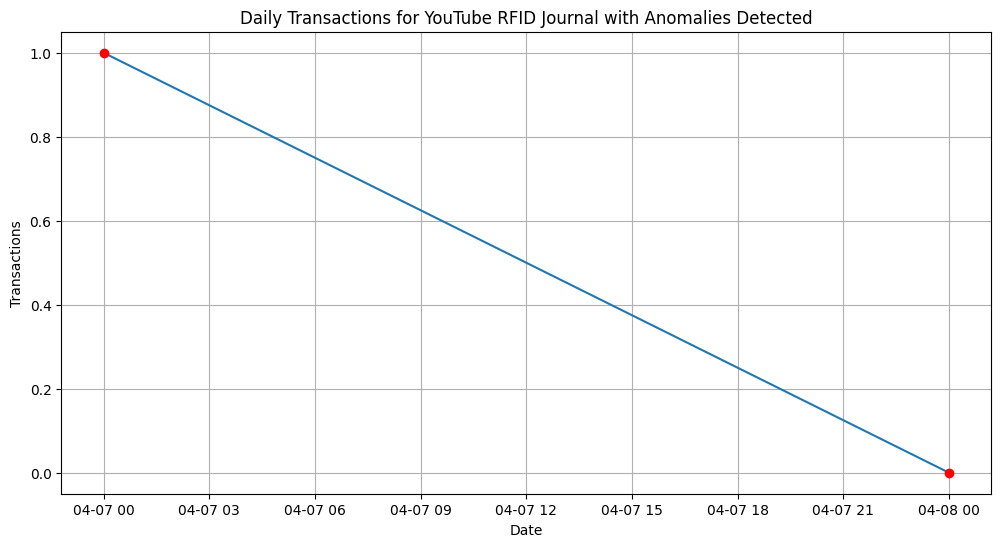

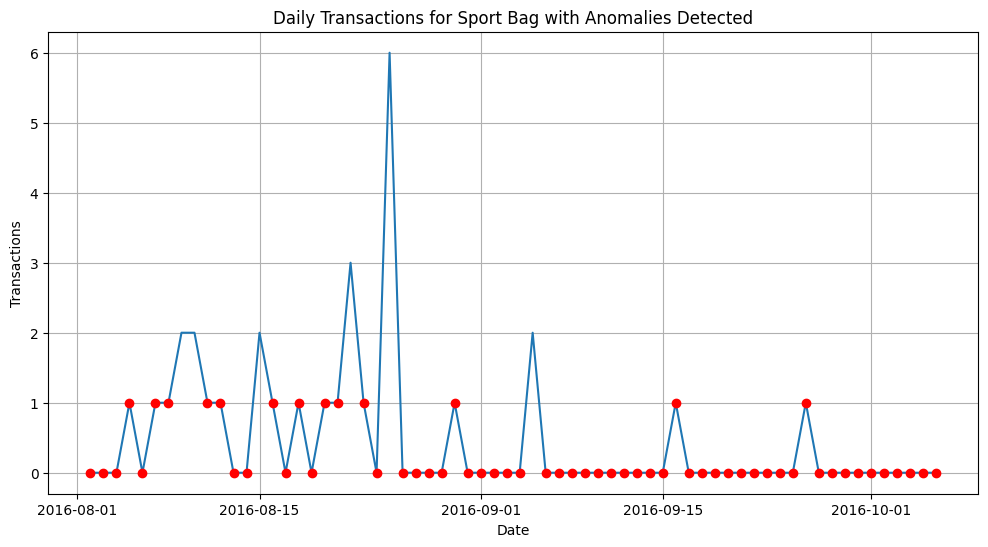

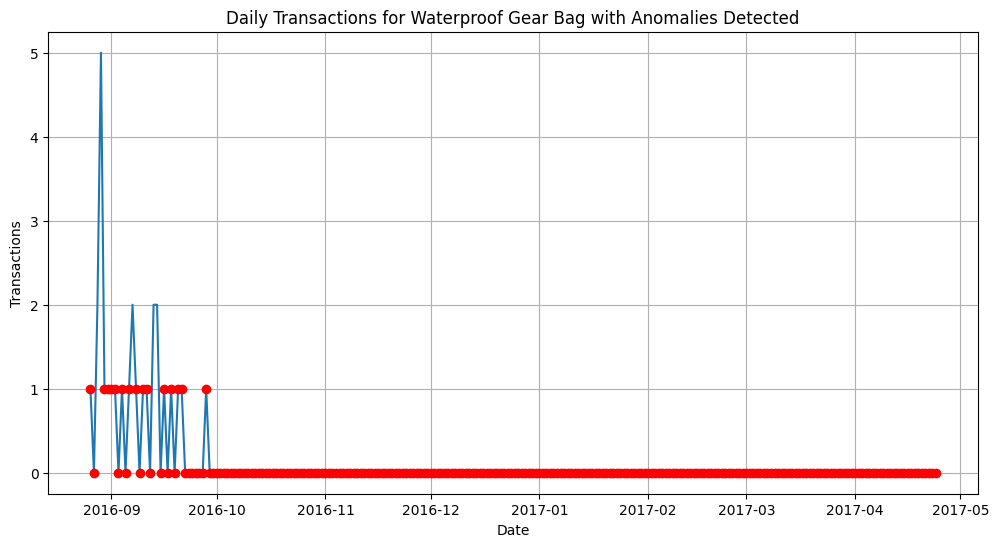

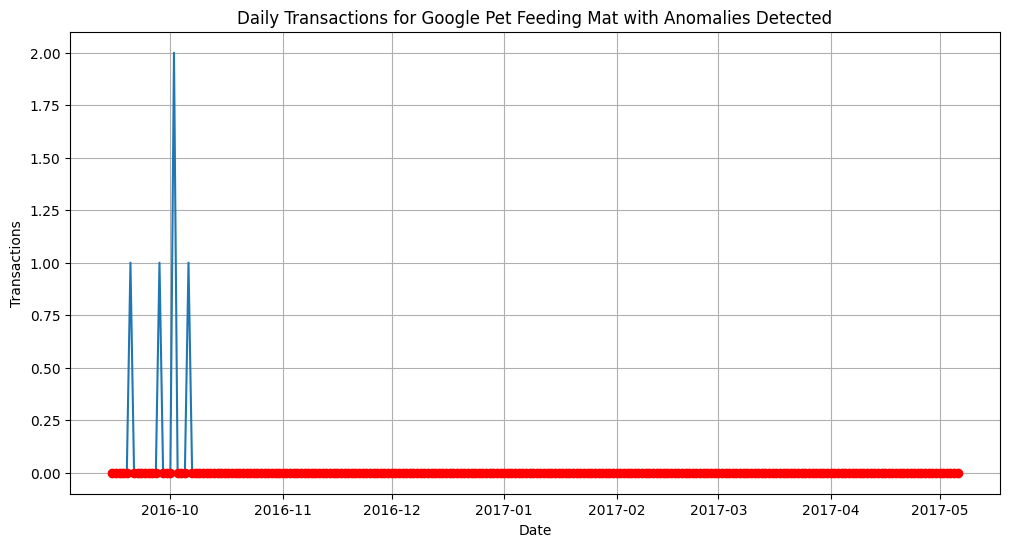

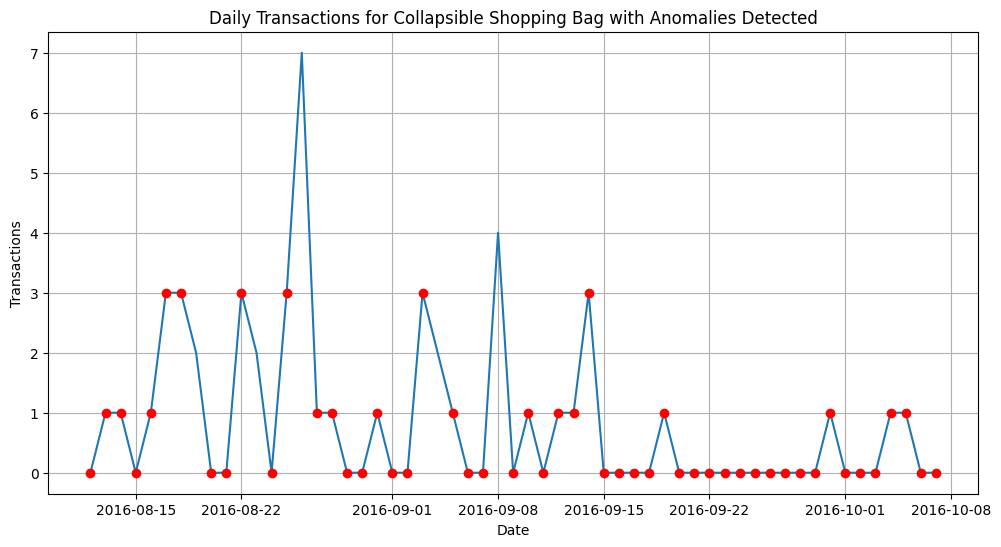

In [182]:
# List of specific products
products = ['YouTube RFID Journal', 'Sport Bag', 'Waterproof Gear Bag', 'Google Pet Feeding Mat', 'Collapsible Shopping Bag']

# Detect anomalies using Local Outlier Factor (LOF) algorithm
for product in products:
    df_product = df[df['v2ProductName'] == product].resample('D').sum()
    if not df_product.empty:
        X = df_product['transactions'].values.reshape(-1, 1)
        clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
        threshold = -1.5
        anomalies = scores_pred > threshold
        df_product['anomaly'] = anomalies
        df_anomalies = df_product[df_product['anomaly'] == True]
        if not df_anomalies.empty:
            plt.figure(figsize=(12,6))
            plt.plot(df_product.index, df_product['transactions'])
            plt.plot(df_anomalies.index, df_anomalies['transactions'], 'ro')
            plt.title(f'Daily Transactions for {product} with Anomalies Detected')
            plt.xlabel('Date')
            plt.ylabel('Transactions')
            plt.grid(True)
            plt.show()

Based on the data above, products such as Sport Bag, Waterproof Gear Bag, Feeding Mat, Collapsible Shopping Bag have anomalies. Anomalies marked as red dots. This anomalies occurs due to many factors. such as promotions, holidays, or other external events that may have affected sales.

##### 3. Identify the most profitable city or province based on the total transaction revenue.

GPT Prompt:

"I want identify the most profitable city or province based on the total transaction revenue. Where column is 'city', and 'totalTransactionRevenue' from dataframe(df)."

                              city  totalTransactionRevenue
170  not available in demo dataset             6.510244e+10
104                       New York             2.125081e+10
135                  San Francisco             7.774340e+09
98                   Mountain View             5.713290e+09
160                        Toronto             5.427980e+09
34                         Chicago             4.621840e+09
8                        Ann Arbor             3.898660e+09
11                         Atlanta             3.182210e+09
85                       Maracaibo             2.853540e+09
79                     Los Angeles             1.674930e+09
152                      Sunnyvale             1.344590e+09


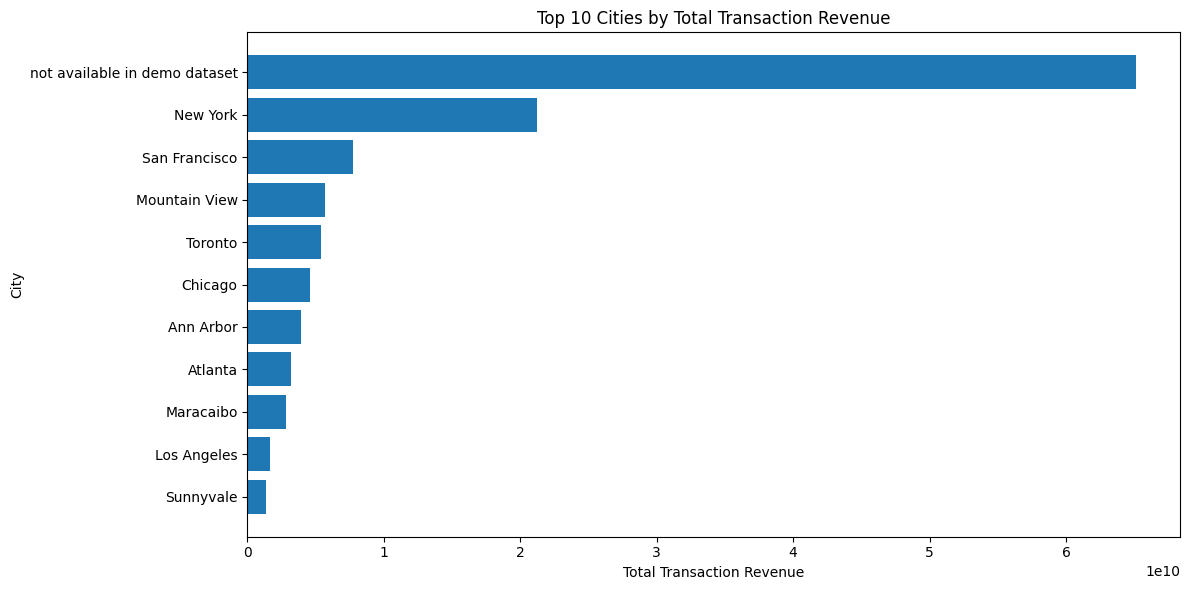

In [192]:
# Group by 'city' and calculate total transaction revenue
most_profit_city = df.groupby('city')['totalTransactionRevenue'].sum().reset_index()

# Sort the dataframe based on 'totalTransactionRevenue' in descending order
sorted_city_revenue = most_profit_city.sort_values(by='totalTransactionRevenue', ascending=False)

# Get the top 10 cities or provinces based on total transaction revenue
top_10_city = sorted_city_revenue.head(11)

print(top_10_city)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_10_city['city'], top_10_city['totalTransactionRevenue'])
plt.xlabel('Total Transaction Revenue')
plt.ylabel('City')
plt.title('Top 10 Cities by Total Transaction Revenue')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest revenue at the top
plt.tight_layout()
plt.show()

Based on the data above, the cities or provinces that generate the most revenue are:
1. New York
2. San Fransisco
3. Mountain View
4. Toronto
5. Chicago

In [194]:
df.columns

Index(['fullVisitorId', 'channelGrouping', 'time', 'country', 'city',
       'totalTransactionRevenue', 'transactions', 'timeOnSite', 'pageviews',
       'sessionQualityDim', 'visitId', 'type', 'productRefundAmount',
       'productQuantity', 'productPrice', 'productRevenue', 'productSKU',
       'v2ProductName', 'v2ProductCategory', 'productVariant', 'currencyCode',
       'itemQuantity', 'itemRevenue', 'transactionRevenue', 'transactionId',
       'pageTitle', 'searchKeyword', 'pagePathLevel1', 'eCommerceAction_type',
       'eCommerceAction_step', 'eCommerceAction_option', 'year', 'month',
       'day'],
      dtype='object')

In [195]:
df_sql = pd.DataFrame(df[['channelGrouping', 'country', 'fullVisitorId', 'timeOnSite', 'pageviews', 'sessionQualityDim', 'v2ProductName', 'productRevenue', 'productQuantity', 'productRefundAmount']])

In [196]:
df_sql.reset_index(inplace=True)

In [197]:
df_sql.head()

,date,channelGrouping,country,fullVisitorId,timeOnSite,pageviews,sessionQualityDim,v2ProductName,productRevenue,productQuantity,productRefundAmount
0,2017-07-21,Organic Search,Taiwan,2515546493837534633,1567.0,82.0,17.0,Suitcase Organizer Cubes,0.0,0.0,0.0
1,2017-04-13,Organic Search,France,9361741997835388618,321.0,8.0,0.0,26 oz Double Wall Insulated Bottle,0.0,0.0,0.0
2,2017-07-27,Referral,United States,7313828956068851679,927.0,11.0,63.0,Metal Texture Roller Pen,0.0,0.0,0.0
3,2017-07-31,Organic Search,United States,6036794406403793540,1616.0,13.0,38.0,Metal Texture Roller Pen,0.0,0.0,0.0
4,2017-07-28,Organic Search,Canada,7847280609739507227,1222.0,45.0,53.0,Metal Texture Roller Pen,0.0,0.0,0.0


In [198]:
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 10000 non-null  datetime64[ns]
 1   channelGrouping      10000 non-null  object        
 2   country              10000 non-null  object        
 3   fullVisitorId        10000 non-null  uint64        
 4   timeOnSite           10000 non-null  float64       
 5   pageviews            10000 non-null  float64       
 6   sessionQualityDim    10000 non-null  float64       
 7   v2ProductName        10000 non-null  object        
 8   productRevenue       10000 non-null  float64       
 9   productQuantity      10000 non-null  float64       
 10  productRefundAmount  10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3), uint64(1)
memory usage: 859.5+ KB


In [199]:
df_sql = df_sql.drop('date', axis=1)

In [207]:
df_sql.to_csv("preprocess.ecommerce.all_sessions-sql.csv", index=False)